In [1]:
from ultralytics import YOLOv10
import random
import numpy as np
import torch

/home/fisher/anaconda3/envs/ebyolo/lib/python3.10/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
/home/fisher/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pt_path = '/home/fisher/fisher/Peoples/sst_yolo/yolov10/runs/detect/train24/weights/last.pt'
   # train15 last = fuzzy , train24, 21 last = proposed , train28 epoch62 = standard
model = YOLOv10(pt_path)
model.load(pt_path)
#model = YOLOv10.from_pretrained('jameslahm/yolov10b')

/home/fisher/fisher/Peoples/sst_yolo/yolov10/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")


Transferred 919/919 items from pretrained weights


YOLOv10(
  (model): YOLOv10DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=Tru

In [ ]:
model.train(model=pt_path, data='military.yaml', epochs=200, batch=8, imgsz=640, device=2, mosaic=0.0, patience=0, pri=2.0, conf=0.25, mixup=0.0, cls=2.0, save_period=1)
#model.train(data='military.yaml', epochs=500, batch=8, imgsz=640, device=2, mosaic=0.0, patience=0, pri=2.0, cls=2.0, conf=0.25, mixup=0.0)

In [3]:
model.val(data='military.yaml', batch=8, imgsz=640, device=1, conf=0.25)

Ultralytics YOLOv8.1.34 🚀 Python-3.10.14 torch-2.4.0+cu121 CUDA:1 (Quadro RTX 5000, 16117MiB)
YOLOv10b summary (fused): 434 layers, 46378798 parameters, 0 gradients, 226.3 GFLOPs


val: Scanning /home/fisher/fisher/Peoples/sst_yolo/datasets/military(low)/labels/test.cache... 293 images, 0 backgrounds, 0 corrupt: 100%|██████████| 293/293 [00:00<?, ?it/s]
                 Class     Images  Instances      mAP50      map75   mAP50-95  Prior_Acc: 100%|██████████| 37/37 [00:08<00:00,  4.43it/s]


                   all        293       1049      0.911       0.77      0.722      0.795
                 tanks        293        491      0.986       0.96      0.867
                 armor        293        142      0.877      0.828      0.733
               vehicle        293        105      0.941      0.875       0.84
                person        293        311      0.841      0.417      0.448
Speed: 0.3ms preprocess, 22.1ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to /home/fisher/fisher/Peoples/sst_yolo/yolov10/runs/detect/val28


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f90c67eb940>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [ ]:
## Predict 및 결과 시각화

In [3]:
from PIL import Image
import torchvision
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#model.load('/home/fisher/fisher/Peoples/sst_yolo/yolov10/runs/detect/train20/weights/last.pt')

In [3]:
test_img_path = '/home/fisher/fisher/Peoples/sst_yolo/datasets/military/images/train'
test_img_list = os.listdir(test_img_path)

In [9]:
name_list = []

for elt in test_img_list:
    name_list.append(elt[:-4])

In [19]:
name_list.index('4-collage (51)')

1140

In [5]:
n = 

img_path = os.path.join( test_img_path, test_img_list[n] )
#img_path = '/home/fisher/fisher/Peoples/sst_yolo/datasets/military/images/test/tank (337).jpg'

x = torchvision.transforms.ToTensor()(Image.open(img_path).resize((640,640)))
x = x.unsqueeze(0)
softmax_list = []

print(n)
n += 1

for _ in range(3):
    out = model(x, device=2)
    for results in out:
        orig_img = results.orig_img
        img = orig_img.copy()
        boxes = results.boxes  # 바운딩 박스 정보
        names = results.names  # 클래스 이름 정보
        priors = results.prior  # Prior 정보
    softmax_list.append(torch.nn.Softmax(dim=0)(priors.cpu()))

output = torch.stack(softmax_list, 0)
argmax = torch.argmax(torch.mean(output, axis=0))

print("Argmax: {0}".format(argmax), '\n',
        "Mean: {0}".format(torch.mean(output, axis=0)[argmax]), '\n',
        "Var: {0}".format(torch.var(output, axis=0)[argmax])
)


1223






Argmax: 1 
 Mean: 0.6443323493003845 
 Var: 0.0016752304509282112


In [ ]:
#n = 1134
to_show_list = []

for n in range(0, len(test_img_list)): 
    img_path = os.path.join( test_img_path, test_img_list[n] )
    #img_path = '/home/fisher/fisher/Peoples/sst_yolo/datasets/military/images/test/tank (337).jpg'

    x = torchvision.transforms.ToTensor()(Image.open(img_path).resize((640,640)))
    x = x.unsqueeze(0)
    softmax_list = []

    #print(n)
    #n += 1

    for _ in range(1):
        out = model(x, device=2)
        for results in out:
            orig_img = results.orig_img
            img = orig_img.copy()
            boxes = results.boxes  # 바운딩 박스 정보
            names = results.names  # 클래스 이름 정보
            priors = results.prior  # Prior 정보
        softmax_list.append(torch.nn.Softmax(dim=0)(priors.cpu()))

    output = torch.stack(softmax_list, 0)
    if len(output[0]) >= 2 :
        argmax = torch.argmax(torch.mean(output, axis=0))
        if (boxes.cls != boxes.cls[argmax]).sum() > 0 : to_show_list.append(n)
        # if torch.var(output, axis=0)[argmax] >= 0.00001 :
        #     to_show_list.append(n)
    # print("Argmax: {0}".format(argmax), '\n',
    #         "Mean: {0}".format(torch.mean(output, axis=0)[argmax]), '\n',
    #         "Var: {0}".format(torch.var(output, axis=0)[argmax])
    # )


In [523]:
to_show_list[204]

940

In [95]:
n

342


1


/home/fisher/.local/lib/python3.10/site-packages/torch/nn/modules/module.py:1553: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


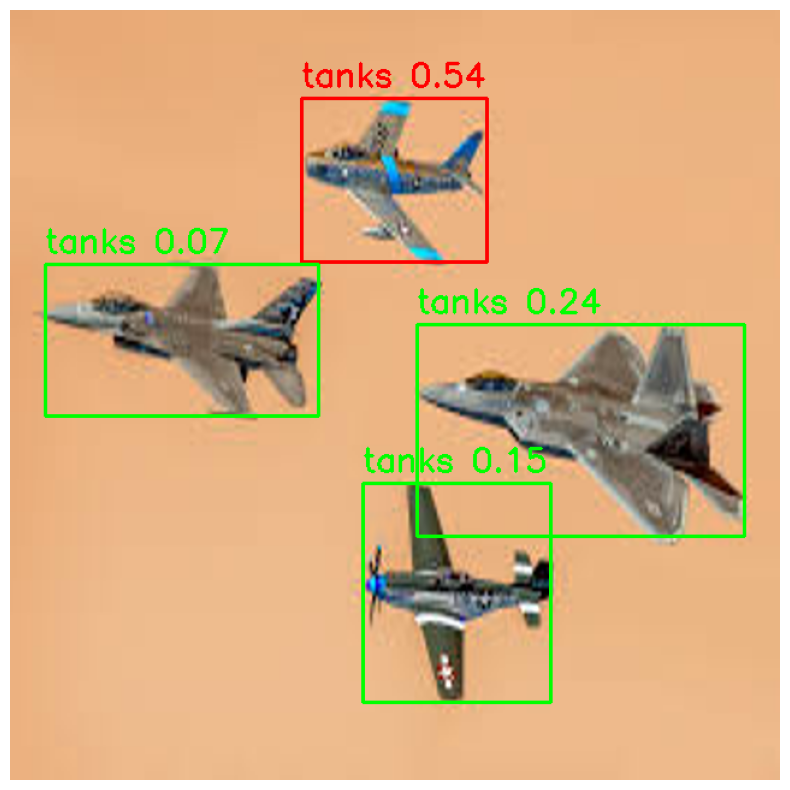

In [8]:
n = 1
#img_path = os.path.join( test_img_path, test_img_list[n] )
img_path = '/home/fisher/fisher/Peoples/sst_yolo/yolov10/aircraft.jpg'

x = torchvision.transforms.ToTensor()(Image.open(img_path).resize((640,640)))
x = x.unsqueeze(0)
out = model(x, device=0)

# 결과 리스트의 각 요소를 순회하며 바운딩 박스와 레이블 그리기
for results in out:
    orig_img = results.orig_img
    img = orig_img.copy()
    boxes = results.boxes  # 바운딩 박스 정보
    names = results.names  # 클래스 이름 정보
    priors = results.prior  # Prior 정보
    prior_score = torch.nn.Softmax()(priors)

    # 최대 prior 값을 가진 인덱스를 찾기
    max_prior_index = priors.argmax()  

    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # 바운딩 박스 좌표
        label = names[int(box.cls[0])]  # 클래스 레이블
        #score = box.conf[0].item()  # 신뢰도 점수
        score = prior_score[i]  # 위험객체 확률
        
        # 바운딩 박스 색상 설정
        if i == max_prior_index:
            color = (0, 0, 255)  # 빨간색 (최대 prior 값)
        else:
            color = (0, 255, 0)  # 초록색 (기타)
        
        # 바운딩 박스와 레이블 그리기
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(img, f'{label} {score:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)


# 이미지를 matplotlib로 시각화
print(n)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

n += 1

In [8]:
priors

tensor([ 0.1550, -1.2096, -0.1773,  0.8691], device='cuda:0')

In [6]:
prior_score

tensor([0.5433, 0.2387, 0.0684, 0.0557, 0.0381, 0.0557], device='cuda:0')



152


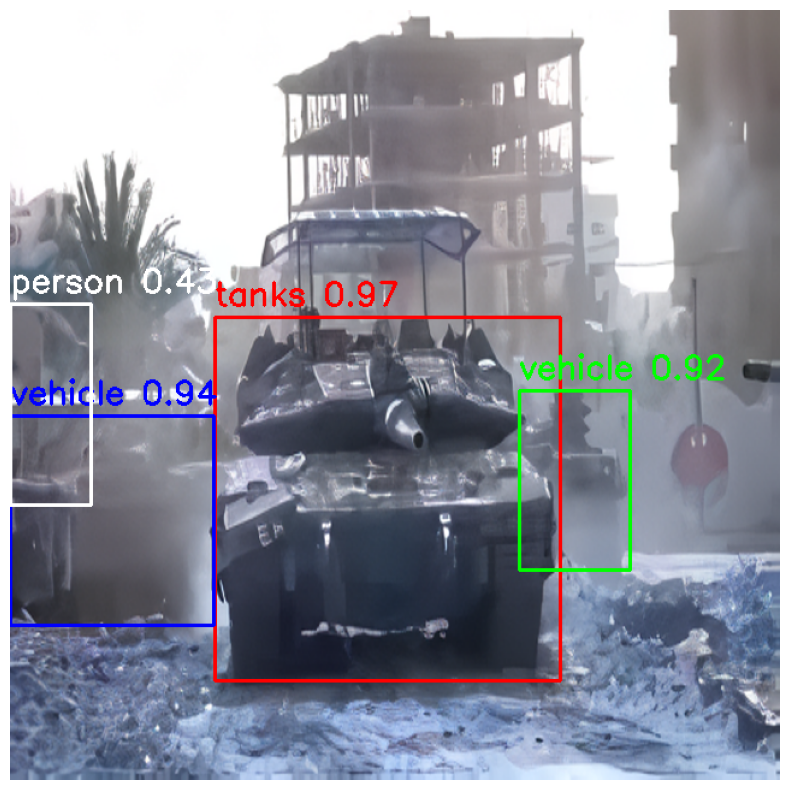

In [340]:
n = 152

img_path = os.path.join( test_img_path, test_img_list[n] )

x = torchvision.transforms.ToTensor()(Image.open(img_path).resize((640,640)))
x = x.unsqueeze(0)
out = model(x, device=0)

# 결과 리스트의 각 요소를 순회하며 바운딩 박스와 레이블 그리기
for results in out:
    orig_img = results.orig_img
    img = orig_img.copy()
    boxes = results.boxes  # 바운딩 박스 정보
    names = results.names  # 클래스 이름 정보
    priors = results.prior  # Prior 정보
    
    # 2, 3번째 prior 값을 가진 인덱스를 찾기
    prior_index = (np.argsort(priors.cpu())).tolist()[::-1]

    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # 바운딩 박스 좌표
        label = names[int(box.cls[0])]  # 클래스 레이블
        score = box.conf[0].item()  # 신뢰도 점수
        
        # 바운딩 박스 색상 설정
        if i == prior_index[0]:
            color = (0, 0, 255)  # 빨간색 (최고 위험)
        elif i == prior_index[1]:
            color = (255, 255, 255)  # 초록색 (2번째 위험)
        elif i == prior_index[2] : 
            color = (0, 255, 0)  # 파란색 (3번째 위험)
        else : color = (255, 0, 0)
        
        # 바운딩 박스와 레이블 그리기

        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(img, f'{label} {score:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)


# 이미지를 matplotlib로 시각화
print(n)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [86]:
j

78

In [336]:
boxes.cls

tensor([0., 1., 1., 3.], device='cuda:0')

In [25]:
priors

tensor([-19.1133,  14.1833, -21.7529], device='cuda:0')

In [5]:
image_folder = '/home/fisher/fisher/Peoples/sst_yolo/datasets/military/images/train'
label_folder = '/home/fisher/fisher/Peoples/sst_yolo/datasets/military/labels/train'
image_extensions = ['.jpg', '.png']
image_files = [f for f in os.listdir(image_folder) if os.path.splitext(f)[1].lower() in image_extensions]

obj2 = []
obj3 = []
for n in range(len(image_files)) :
    image_file = image_files[n]

    image_path = os.path.join(image_folder, image_file)
    label_path = os.path.join(label_folder, os.path.splitext(image_file)[0] + '.txt')

    if os.path.exists(label_path):
        with open(label_path, 'r') as file:
            lines = file.readlines()
            if len(lines) == 2 : obj2.append(n)
            elif len(lines) >= 3 : obj3.append(n)


In [39]:
len(obj3)

900

In [16]:
n

5

In [10]:
out[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1., 0., 2.], device='cuda:0')
conf: tensor([0.4236, 0.3902, 0.3123], device='cuda:0')
data: tensor([[4.0095e+02, 2.5707e+02, 5.9491e+02, 4.2650e+02, 4.2364e-01, 1.0000e+00],
        [4.0095e+02, 2.5707e+02, 5.9491e+02, 4.2650e+02, 3.9015e-01, 0.0000e+00],
        [3.0992e+00, 1.0510e+01, 5.0210e+02, 5.5348e+02, 3.1227e-01, 2.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([3, 6])
xywh: tensor([[497.9312, 341.7851, 193.9577, 169.4361],
        [497.9312, 341.7851, 193.9577, 169.4361],
        [252.6010, 281.9945, 499.0035, 542.9680]], device='cuda:0')
xywhn: tensor([[0.7780, 0.5340, 0.3031, 0.2647],
        [0.7780, 0.5340, 0.3031, 0.2647],
        [0.3947, 0.4406, 0.7797, 0.8484]], device='cuda:0')
xyxy: tensor([[400.9524, 257.0671, 594.9101, 426.5032],
        [400.9524, 257.0671, 594.9101, 426.5032],
        [  3.0992,  10.5105, 502.1027, 553.4785]], device='cuda:0')


In [1220]:
priors

tensor([ 1.9970, -0.1247,  1.0846], device='cuda:0')

In [234]:
n # 3 19 25 38 57 58 71 105 125 126 138 159 170 173 192 270 278 287

147


351


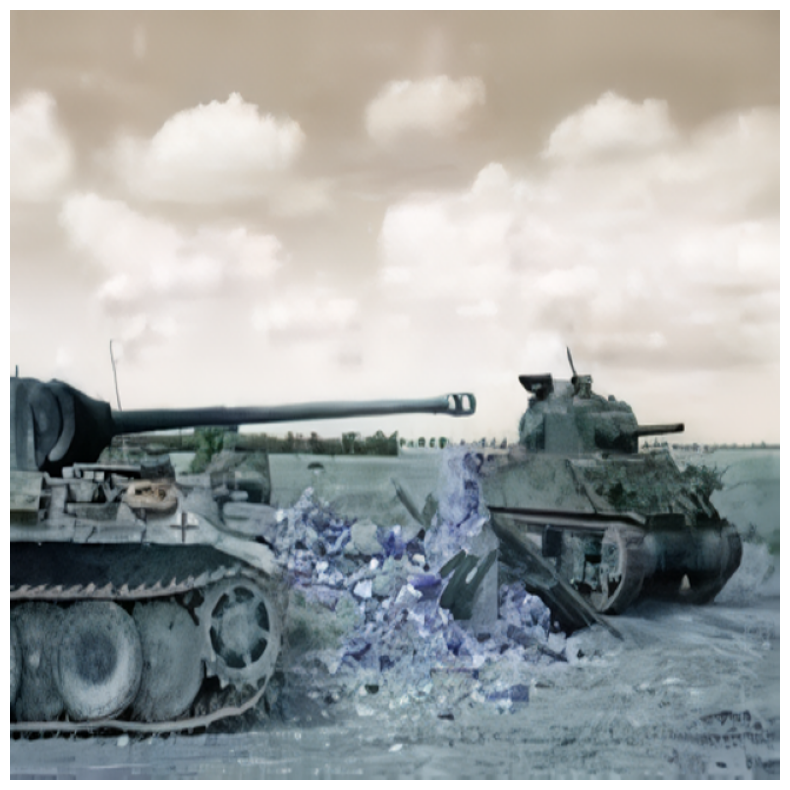

In [487]:
# 3 19 25 38 57 58 71 105 125 126 138 159 170 173 192 270 278 287
n = 351

img_path = os.path.join( test_img_path, test_img_list[n] )
#img_path = '/home/fisher/fisher/Peoples/sst_yolo/datasets/military/images/test/tank (337).jpg'

x = torchvision.transforms.ToTensor()(Image.open(img_path).resize((640,640)))
x = x.unsqueeze(0)
out = model(x, device=2)

# 결과 리스트의 각 요소를 순회하며 바운딩 박스와 레이블 그리기
for results in out:
    orig_img = results.orig_img
    img = orig_img.copy()
    boxes = results.boxes  # 바운딩 박스 정보
    names = results.names  # 클래스 이름 정보
    priors = results.prior  # Prior 정보
    

# 이미지를 matplotlib로 시각화
print(n)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

n += 1

# 라벨로 시각화

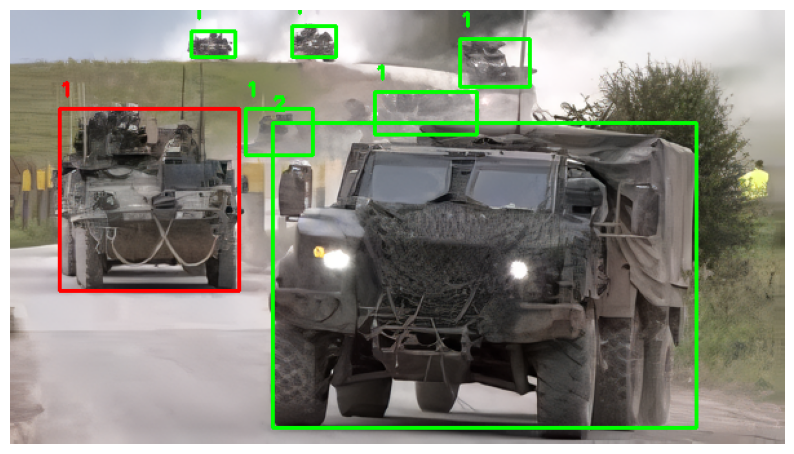

415
military_vehicles_457.png


In [19]:
# 경로 설정
image_folder = '/home/fisher/fisher/Peoples/sst_yolo/datasets/military/images/train'
label_folder = '/home/fisher/fisher/Peoples/sst_yolo/datasets/military/labels/train'

# 이미지 확장자
image_extensions = ['.jpg', '.png']

# 모든 이미지 파일 가져오기
image_files = [f for f in os.listdir(image_folder) if os.path.splitext(f)[1].lower() in image_extensions]

# YOLO 라벨 파일 읽고 바운딩박스 그리기
n = 415
image_file = image_files[n]

image_path = os.path.join(image_folder, image_file)
label_path = os.path.join(label_folder, os.path.splitext(image_file)[0] + '.txt')

# 이미지 읽기
image = cv2.imread(image_path)
height, width = image.shape[:2]

# 라벨 파일 읽기
if os.path.exists(label_path):
    with open(label_path, 'r') as file:
        lines = file.readlines()
        for idx, line in enumerate(lines):
            # 라벨 파일의 각 라인 읽기
            class_id, x_center, y_center, bbox_width, bbox_height = map(float, line.split())
            
            # YOLO 형식의 좌표를 이미지 좌표로 변환
            x_center = int(x_center * width)
            y_center = int(y_center * height)
            bbox_width = int(bbox_width * width)
            bbox_height = int(bbox_height * height)
            
            # 바운딩 박스 좌표 계산
            x1 = int(x_center - bbox_width / 2)
            y1 = int(y_center - bbox_height / 2)
            x2 = int(x_center + bbox_width / 2)
            y2 = int(y_center + bbox_height / 2)
            
            # 첫 번째 바운딩 박스는 빨간색, 나머지는 초록색
            if idx == 0:
                color = (0, 0, 255)  # 빨간색 (BGR)
            else:
                color = (0, 255, 0)  # 초록색 (BGR)                
            # 바운딩 박스 그리기
            cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
            cv2.putText(image, str(int(class_id)), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)


# 이미지 출력 (matplotlib 사용)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#plt.title(image_file)
plt.axis('off')
plt.show()
print(n)
print(image_file)

In [18]:
image_files.index('military_vehicles_457.png')

415

In [7]:
boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1., 1., 3.], device='cuda:0')
conf: tensor([0.8538, 0.8517, 0.5878], device='cuda:0')
data: tensor([[3.7887e+00, 3.3432e+02, 2.0377e+02, 5.4736e+02, 8.5384e-01, 1.0000e+00],
        [2.3148e+02, 2.0138e+02, 6.2668e+02, 5.7119e+02, 8.5172e-01, 1.0000e+00],
        [5.5650e+02, 4.5814e+02, 5.9945e+02, 6.0367e+02, 5.8778e-01, 3.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([3, 6])
xywh: tensor([[103.7777, 440.8362, 199.9779, 213.0396],
        [429.0791, 386.2880, 395.1943, 369.8077],
        [577.9781, 530.9009,  42.9524, 145.5293]], device='cuda:0')
xywhn: tensor([[0.1622, 0.6888, 0.3125, 0.3329],
        [0.6704, 0.6036, 0.6175, 0.5778],
        [0.9031, 0.8295, 0.0671, 0.2274]], device='cuda:0')
xyxy: tensor([[  3.7887, 334.3163, 203.7666, 547.3560],
        [231.4819, 201.3841, 626.6763, 571.1919],
        [556.5019, 458.1363, 599.4543, 603.6656]], device='cuda:0')


In [6]:
def fuzzy(output_boxes):
    num_obj = len(output_boxes.cls)
    size_fuzzy = (output_boxes.xywh[:,2] * output_boxes.xywh[:,3]) / (output_boxes.orig_shape[0] * output_boxes.orig_shape[1])
    cls_fuzzy = 300 - output_boxes.cls.int() * 100
    final_fuzzy = size_fuzzy * cls_fuzzy
    return final_fuzzy


1


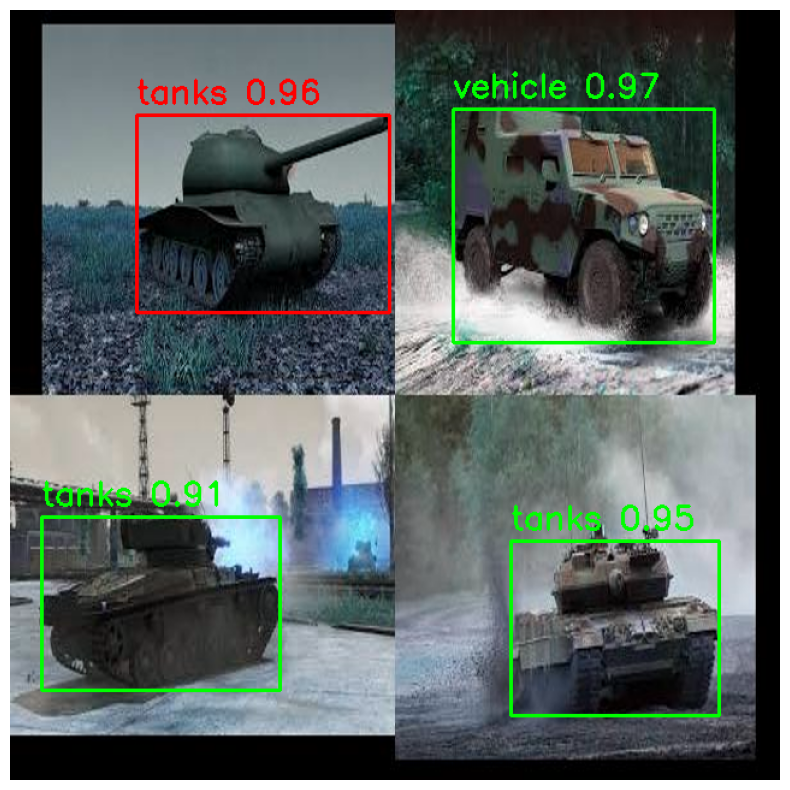

In [15]:
n = 1

img_path = os.path.join( test_img_path, test_img_list[n] )
#img_path = '/home/fisher/fisher/Peoples/sst_yolo/datasets/military/images/test/tank (337).jpg'

x = torchvision.transforms.ToTensor()(Image.open(img_path).resize((640,640)))
x = x.unsqueeze(0)
out = model(x, device=2)

# 결과 리스트의 각 요소를 순회하며 바운딩 박스와 레이블 그리기
for results in out:
    orig_img = results.orig_img
    img = orig_img.copy()
    boxes = results.boxes  # 바운딩 박스 정보
    names = results.names  # 클래스 이름 정보
    
    # 최대 prior 값을 가진 인덱스를 찾기
    max_prior_index = fuzzy(boxes).cpu().numpy().argmax()
    
    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # 바운딩 박스 좌표
        label = names[int(box.cls[0])]  # 클래스 레이블
        score = box.conf[0].item()  # 신뢰도 점수
        
        # 바운딩 박스 색상 설정
        if i == max_prior_index:
            color = (0, 0, 255)  # 빨간색 (최대 prior 값)
        else:
            color = (0, 255, 0)  # 초록색 (기타)
        
        # 바운딩 박스와 레이블 그리기
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(img, f'{label} {score:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

# 이미지를 matplotlib로 시각화
print(n)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

n += 1

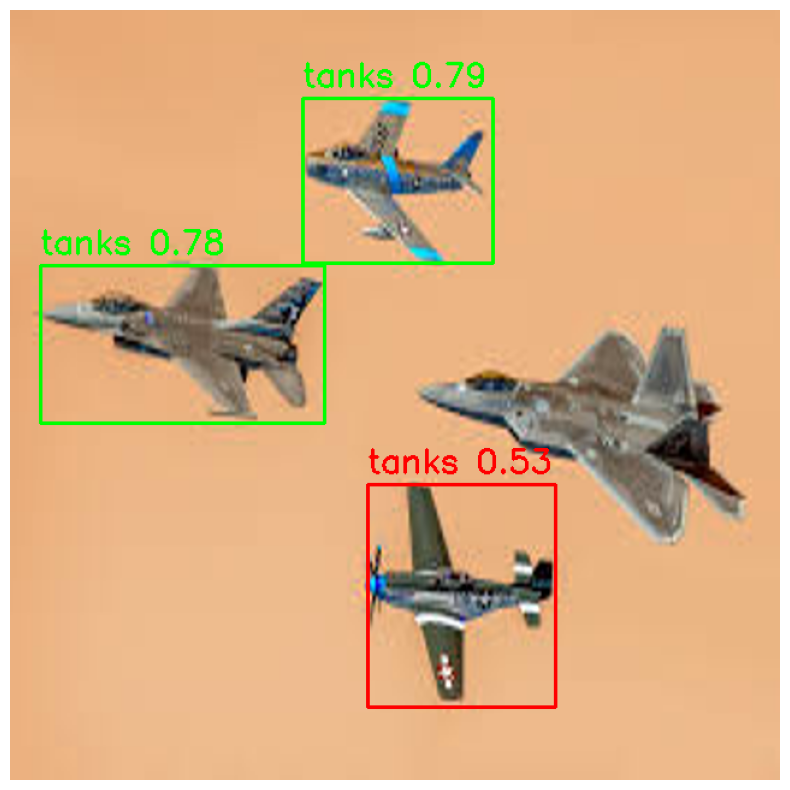

In [4]:
#n = 6

img_path = '/home/fisher/fisher/Peoples/sst_yolo/yolov10/aircraft.jpg'
#img_path = '/home/fisher/fisher/Peoples/sst_yolo/datasets/military/images/test/tank (337).jpg'

x = torchvision.transforms.ToTensor()(Image.open(img_path).resize((640,640)))
x = x.unsqueeze(0)
out = model(x)

# 결과 리스트의 각 요소를 순회하며 바운딩 박스와 레이블 그리기
for results in out:
    orig_img = results.orig_img
    img = orig_img.copy()
    boxes = results.boxes  # 바운딩 박스 정보
    names = results.names  # 클래스 이름 정보
    priors = results.prior  # Prior 정보
    
    # 최대 prior 값을 가진 인덱스를 찾기
    max_prior_index = priors.argmax()
    
    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # 바운딩 박스 좌표
        label = names[int(box.cls[0])]  # 클래스 레이블
        score = box.conf[0].item()  # 신뢰도 점수
        
        # 바운딩 박스 색상 설정
        if i == max_prior_index:
            color = (0, 0, 255)  # 빨간색 (최대 prior 값)
        else:
            color = (0, 255, 0)  # 초록색 (기타)
        
        # 바운딩 박스와 레이블 그리기
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(img, f'{label} {score:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

# 이미지를 matplotlib로 시각화
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [15]:
def show(n, k): 
    img_path = os.path.join( test_img_path, test_img_list[n] )
    #img_path = '/home/fisher/fisher/Peoples/sst_yolo/datasets/military/images/test/tank (337).jpg'

    x = torchvision.transforms.ToTensor()(Image.open(img_path).resize((640,640)))
    x = x.unsqueeze(0)
    
    prior_list = []

    for _ in range(k) : 
        out = model(x, device=2)

        for results in out:
            orig_img = results.orig_img
            img = orig_img.copy()
            boxes = results.boxes  # 바운딩 박스 정보
            names = results.names  # 클래스 이름 정보
            priors = results.prior  # Prior 정보
            prior_list.append(priors)
           
            #print(priors)
            
            
    bnn_prior = torch.stack(prior_list)
    sf_prior = torch.softmax(bnn_prior, dim=1)
    
    prior_mean = torch.mean(bnn_prior, axis=0)
    prior_var = torch.var(bnn_prior, axis=0)
    sf_mean = torch.mean(sf_prior, axis=0)
    sf_var = torch.var(sf_prior, axis=0)
    

    # 최대 prior 값을 가진 인덱스를 찾기
    max_prior_index = prior_mean.argmax()
    # print(
    #     "n={0}, Mean: {1}, Var: {2}, among {3} objects".format(n, prior_mean[max_prior_index].item(), prior_var[max_prior_index].item(), len(prior_mean)),'\n',
    #     "Sf Mean: {0}, Sf Var: {1}".format(sf_mean[max_prior_index].item(), sf_var[max_prior_index].item())
    #     )
    return sf_mean[max_prior_index].item()
    #return torch.tensor((n, len(prior_mean), prior_mean[max_prior_index].item(), prior_var[max_prior_index].item(), sf_mean[max_prior_index].item(), sf_var[max_prior_index].item()))

    # for i, box in enumerate(boxes):
    #     x1, y1, x2, y2 = map(int, box.xyxy[0])  # 바운딩 박스 좌표
    #     label = names[int(box.cls[0])]  # 클래스 레이블
    #     score = box.conf[0].item()  # 신뢰도 점수
        
    #     # 바운딩 박스 색상 설정
    #     if i == max_prior_index:
    #         color = (0, 0, 255)  # 빨간색 (최대 prior 값)
    #     else:
    #         color = (0, 255, 0)  # 초록색 (기타)
        
    #     # 바운딩 박스와 레이블 그리기
    #     cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
    #     cv2.putText(img, f'{label} {score:.2f}', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    # # 이미지를 matplotlib로 시각화
    # plt.figure(figsize=(10, 10))
    # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # plt.axis('off')
    # plt.show()

In [ ]:
#output_list = []  11, 57, 70, 159, 202, 248, 268, 278, 291
for i in range(279, len(test_img_list)) :
    output_list.append(show(i, k=1))

In [11]:
%matplotlib inline

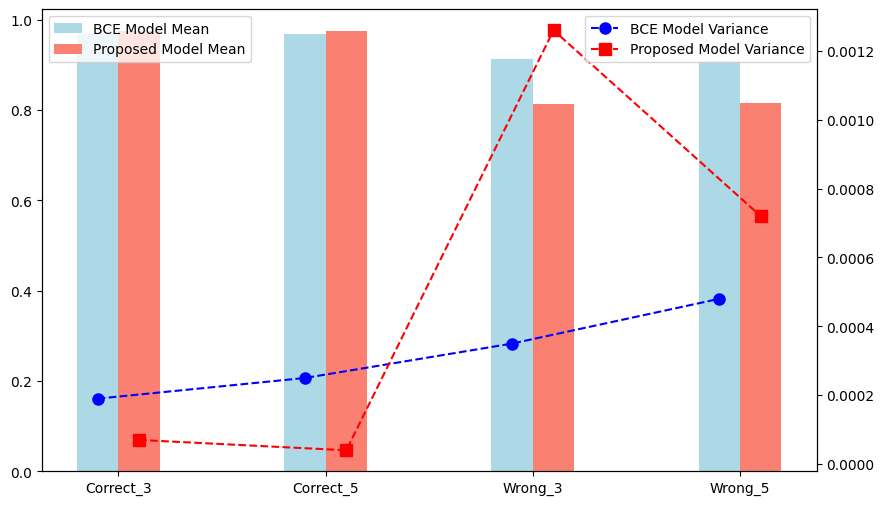

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 정의
categories = ['Correct_3', 'Correct_5', 'Wrong_3', 'Wrong_5']  # x축에 들어갈 4가지 경우
bce_mean = [0.96774, 0.96803, 0.91312, 0.90871]  # BCE Loss 평균
ranking_mean = [0.97432, 0.97477, 0.81418, 0.81614]  # Ranking Loss 평균
bce_var = [0.00019, 0.00025, 0.00035, 0.00048]  # BCE Loss 분산
ranking_var = [0.00007, 0.00004, 0.00126, 0.00072]  # Ranking Loss 분산

x = np.arange(len(categories))  # 카테고리 개수에 따른 위치
width = 0.2  # 막대 너비

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))

# BCE Loss와 Ranking Loss의 평균을 나타내는 막대 그래프
bars1 = ax1.bar(x - width/2, bce_mean, width, label='BCE Model Mean', color='lightblue')
bars2 = ax1.bar(x + width/2, ranking_mean, width, label='Proposed Model Mean', color='salmon')

# 첫 번째 y축 라벨 설정
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.legend(loc='upper left')

# 두 번째 y축 생성 및 분산에 대한 선 그래프 추가
ax2 = ax1.twinx()  # y축 공유
ax2.plot(x - width/2, bce_var, 'o--', color='blue', label='BCE Model Variance', markersize=8)
ax2.plot(x + width/2, ranking_var, 's--', color='red', label='Proposed Model Variance', markersize=8)

# 두 번째 y축 라벨 설정
ax2.legend(loc='upper right')

# 타이틀 설정

plt.show()


In [3]:
from PIL import Image
import torchvision
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')

def calculate_iou (pred_box, gt_box):   # xyxy 형태
    px1, py1, px2, py2 = pred_box 
    gx1, gy1, gx2, gy2 = gt_box
    
    intersection = max(0, min(gx2, px2) - max(gx1, px1)) * max(0, min(gy2, py2) - max(gy1, py1))
    union = (px2 - px1) * (py2 - py1) + (gx2 - gx1) * (gy2 - gy1) - intersection

    return intersection / union

In [ ]:
image_folder = '/home/fisher/fisher/Peoples/sst_yolo/datasets/military/images/test'
label_folder = '/home/fisher/fisher/Peoples/sst_yolo/datasets/military/labels/test'

# 이미지 확장자
image_extensions = ['.jpg', '.png']

# 모든 이미지 파일 가져오기
image_files = [f for f in os.listdir(image_folder) if os.path.splitext(f)[1].lower() in image_extensions]

mean_hist = []
var_hist = []
cor_hist = []

for n in range(len(image_files)): 
    image_file = image_files[n]

    img_path = os.path.join(image_folder, image_file)
    label_path = os.path.join(label_folder, os.path.splitext(image_file)[0] + '.txt')

    x = torchvision.transforms.ToTensor()(Image.open(img_path).resize((640,640)))
    x = x.unsqueeze(0)

    prior_list = []

    for _ in range(3) :
        out = model(x, device=0)
        prior_list.append(torch.nn.Softmax()(out[0].prior))
    #out = model(x, device=0)
    #prior_list.append(torch.nn.Softmax()(out[0].prior))

    boxes = out[0].boxes # 바운딩 박스 정보
    names = out[0].names # 클래스 이름 정보
    priors = torch.stack(prior_list)
    priors_mean, priors_var = torch.mean(priors, axis=0).cpu(), torch.var(priors, axis=0).cpu()

    if len(priors_mean) > 0:
        max_prior_index = priors_mean.argmax()
        pred_max_box = boxes.xyxy[max_prior_index].cpu()
        mean_hist.append(priors_mean[max_prior_index].item())
        var_hist.append(priors_var[max_prior_index].item())
        
        with open(label_path, 'r') as file:
            lines = file.readlines()
            class_id, x_center, y_center, bbox_width, bbox_height = map(float, lines[0].split())
                
            # YOLO 형식의 좌표를 이미지 좌표로 변환
            x_center = int(x_center * 640)
            y_center = int(y_center * 640)
            bbox_width = int(bbox_width * 640)
            bbox_height = int(bbox_height * 640)
            
            # 바운딩 박스 좌표 계산
            x1 = int(x_center - bbox_width / 2)
            y1 = int(y_center - bbox_height / 2)
            x2 = int(x_center + bbox_width / 2)
            y2 = int(y_center + bbox_height / 2)
            
            gt_max_box = torch.tensor([x1, y1, x2, y2])

        if calculate_iou(pred_max_box, gt_max_box) >= 0.5 :
            cor_hist.append(1)
        else: cor_hist.append(0)            

In [13]:
torch.min(torch.tensor(var_hist)[torch.tensor(var_hist) != 0])

tensor(1.1842e-15)

In [ ]:
"""
train24 last
min var = 1.1842e-15
max var = 0.0258
var <= 0.00014 : 234개 (80%)

기본: 0.7671232876712328
"""

In [5]:
cor_hist_tensor = torch.tensor(cor_hist)
var_hist_tensor = torch.tensor(var_hist)
mean_hist_tensor = torch.tensor(mean_hist)

min_means = []
max_vars = []
accuracies = []

var_thresh = torch.max(var_hist_tensor)
while len(cor_hist_tensor[var_hist_tensor <= var_thresh]) >= 234:  
    mean_thresh = torch.min(mean_hist_tensor)
    while len(cor_hist_tensor[mean_hist_tensor >= mean_thresh]) >= 234 :
        filtered = cor_hist_tensor[(var_hist_tensor <= var_thresh) & (mean_hist_tensor >= mean_thresh)]
        min_means.append(mean_thresh.clone().detach())
        max_vars.append(var_thresh.clone().detach())
        accuracies.append( (sum(filtered) / (len(filtered) + 6)).item() )
        print("Min mean: {0}    Max var: {1}    Num of Data: {2}    Accuracy: {3}".format(mean_thresh, var_thresh, len(filtered)+4, (sum(filtered) / (len(filtered) + 4)).item()))
        mean_thresh += 0.01

    var_thresh -= 0.0001
    

Min mean: 0.3388911187648773    Max var: 0.047167565673589706    Num of Data: 292    Accuracy: 0.767123281955719
Min mean: 0.34889110922813416    Max var: 0.047167565673589706    Num of Data: 291    Accuracy: 0.769759476184845
Min mean: 0.358891099691391    Max var: 0.047167565673589706    Num of Data: 290    Accuracy: 0.7724137902259827
Min mean: 0.3688910901546478    Max var: 0.047167565673589706    Num of Data: 290    Accuracy: 0.7724137902259827
Min mean: 0.37889108061790466    Max var: 0.047167565673589706    Num of Data: 290    Accuracy: 0.7724137902259827
Min mean: 0.3888910710811615    Max var: 0.047167565673589706    Num of Data: 290    Accuracy: 0.7724137902259827
Min mean: 0.39889106154441833    Max var: 0.047167565673589706    Num of Data: 290    Accuracy: 0.7724137902259827
Min mean: 0.40889105200767517    Max var: 0.047167565673589706    Num of Data: 287    Accuracy: 0.7804877758026123
Min mean: 0.418891042470932    Max var: 0.047167565673589706    Num of Data: 284    Acc

In [45]:
cor_hist_tensor = torch.tensor(cor_hist)
mean_hist_tensor = torch.tensor(mean_hist)

min_means = []
accuracies = []

mean_thresh = torch.min(mean_hist_tensor)
while len(cor_hist_tensor[mean_hist_tensor >= mean_thresh]) >= 234 :
    filtered = cor_hist_tensor[(mean_hist_tensor >= mean_thresh)]
    min_means.append(mean_thresh.clone().detach())
    accuracies.append( (sum(filtered) / (len(filtered) + 18)).item() )
    print("Min mean: {0}    Max var: {1}    Num of Data: {2}    Accuracy: {3}".format(mean_thresh, var_thresh, len(filtered)+4, (sum(filtered) / (len(filtered) + 18)).item()))
    mean_thresh += 0.001  

Min mean: 0.3333333432674408    Max var: nan    Num of Data: 278    Accuracy: 0.784246563911438
Min mean: 0.3343333303928375    Max var: nan    Num of Data: 277    Accuracy: 0.7835051417350769
Min mean: 0.33533331751823425    Max var: nan    Num of Data: 277    Accuracy: 0.7835051417350769
Min mean: 0.336333304643631    Max var: nan    Num of Data: 277    Accuracy: 0.7835051417350769
Min mean: 0.3373332917690277    Max var: nan    Num of Data: 277    Accuracy: 0.7835051417350769
Min mean: 0.33833327889442444    Max var: nan    Num of Data: 277    Accuracy: 0.7835051417350769
Min mean: 0.33933326601982117    Max var: nan    Num of Data: 277    Accuracy: 0.7835051417350769
Min mean: 0.3403332531452179    Max var: nan    Num of Data: 277    Accuracy: 0.7835051417350769
Min mean: 0.3413332402706146    Max var: nan    Num of Data: 277    Accuracy: 0.7835051417350769
Min mean: 0.34233322739601135    Max var: nan    Num of Data: 277    Accuracy: 0.7835051417350769
Min mean: 0.3433332145214081

In [ ]:
np.max

In [11]:
np.max(accuracies)

0.8525726795196533

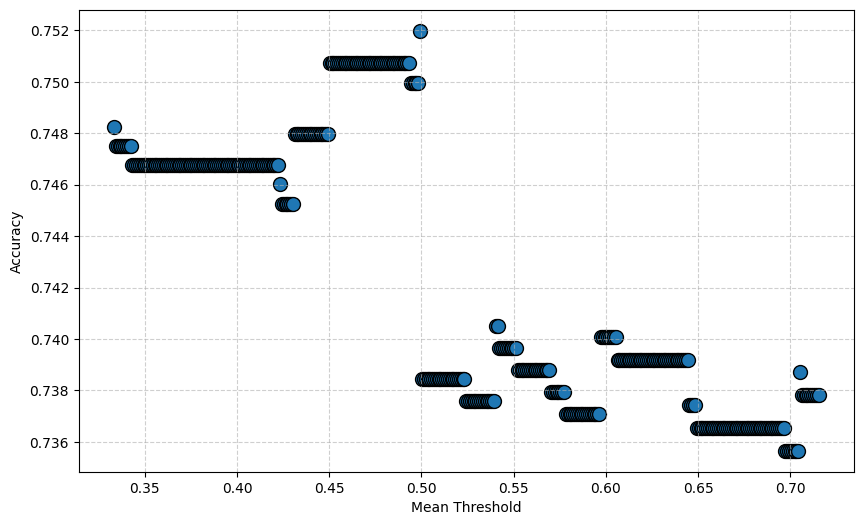

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Create the figure and axis objects

accuracies = (torch.tensor(accuracies)-0.036).tolist()
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot for Min Mean vs Accuracy
scatter = ax.scatter(min_means, accuracies, cmap='viridis', s=100, edgecolors='k', label='Data Points')

# Plot settings
ax.set_xlabel('Mean Threshold')
ax.set_ylabel('Accuracy')
ax.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()


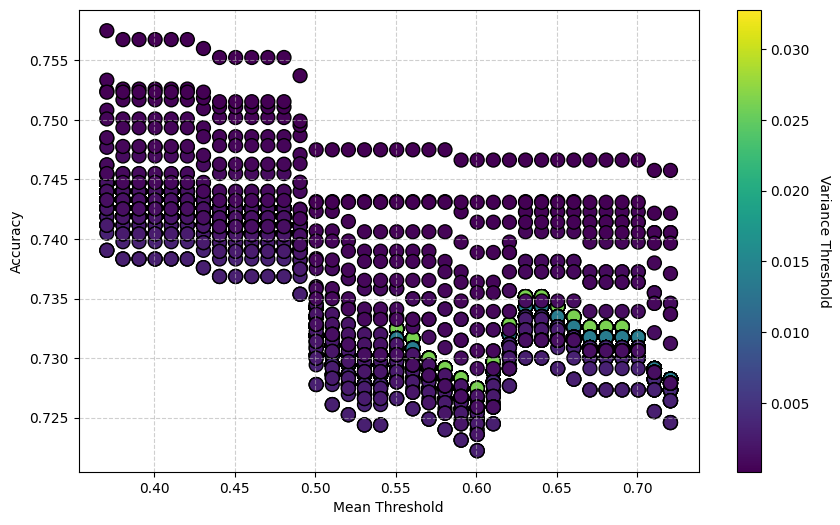

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Create the figure and axis objects

accuracies = (torch.tensor(accuracies)-0.056).tolist()
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot for Min Mean vs Accuracy
scatter = ax.scatter(min_means, accuracies, c=max_vars, cmap='viridis', s=100, edgecolors='k', label='Data Points')

# Add colorbar to show Max Var values
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Variance Threshold', rotation=270, labelpad=15)

# Plot settings
ax.set_xlabel('Mean Threshold')
ax.set_ylabel('Accuracy')
ax.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()


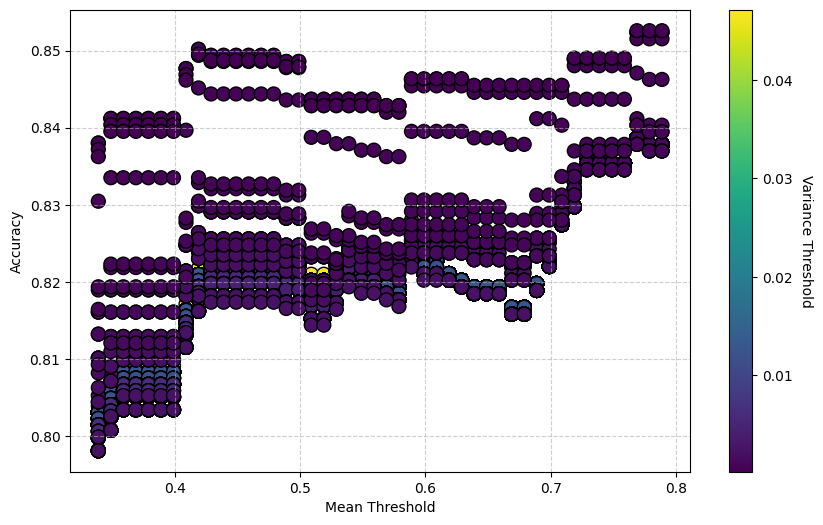

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Create the figure and axis objects

accuracies = (torch.tensor(accuracies)).tolist()
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot for Min Mean vs Accuracy
scatter = ax.scatter(min_means, accuracies, c=max_vars, cmap='viridis', s=100, edgecolors='k', label='Data Points')

# Add colorbar to show Max Var values
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Variance Threshold', rotation=270, labelpad=15)

# Plot settings
ax.set_xlabel('Mean Threshold')
ax.set_ylabel('Accuracy')
ax.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()


In [7]:
np.max(min_means)

0.7888907

In [38]:
len(torch.tensor(cor_hist)[torch.tensor(var_hist)<=0.00014])

234

In [14]:
boxes.xywh

tensor([[477.3450, 175.9210, 217.8044, 184.9880],
        [210.4722, 167.6547, 206.7451, 159.9344],
        [502.0126, 512.1543, 171.9333, 144.2654],
        [122.7394, 491.6366, 199.6949, 146.4161]], device='cuda:0')

In [ ]:

# YOLO 라벨 파일 읽고 바운딩박스 그리기
n = 301
image_file = image_files[n]

image_path = os.path.join(image_folder, image_file)
label_path = os.path.join(label_folder, os.path.splitext(image_file)[0] + '.txt')

# 이미지 읽기
image = cv2.imread(image_path)
height, width = image.shape[:2]

# 라벨 파일 읽기
if os.path.exists(label_path):
    with open(label_path, 'r') as file:
        lines = file.readlines()
        for idx, line in enumerate(lines):
            # 라벨 파일의 각 라인 읽기
            class_id, x_center, y_center, bbox_width, bbox_height = map(float, line.split())
            
            # YOLO 형식의 좌표를 이미지 좌표로 변환
            x_center = int(x_center * width)
            y_center = int(y_center * height)
            bbox_width = int(bbox_width * width)
            bbox_height = int(bbox_height * height)
            
            # 바운딩 박스 좌표 계산
            x1 = int(x_center - bbox_width / 2)
            y1 = int(y_center - bbox_height / 2)
            x2 = int(x_center + bbox_width / 2)
            y2 = int(y_center + bbox_height / 2)
            
            # 첫 번째 바운딩 박스는 빨간색, 나머지는 초록색
            if idx == 0:
                color = (0, 0, 255)  # 빨간색 (BGR)
            else:
                color = (0, 255, 0)  # 초록색 (BGR)                
            # 바운딩 박스 그리기
            cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
            cv2.putText(image, str(int(class_id)), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)


# 이미지 출력 (matplotlib 사용)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#plt.title(image_file)
plt.axis('off')
plt.show()
print(n)
print(image_file)